Text(1, 0.26, 'Abdomen #3')

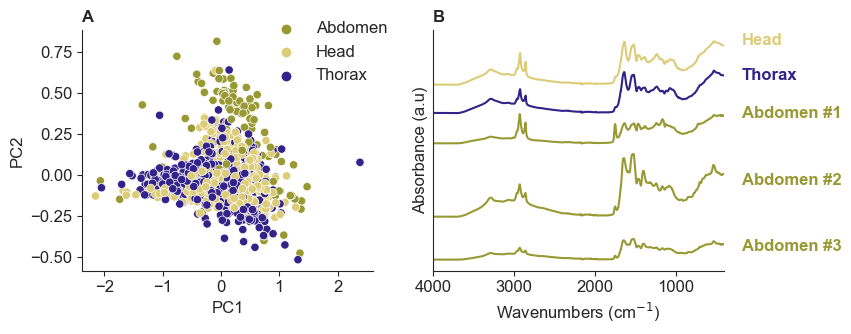

In [5]:
"""This script reproduces figure 2 of the manuscript"""
"""Change log: """

# import packages
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

colorpal = ["#999933", "#DDCC77", "#332288"]

# Import data
#tsetse_data = pd.read_csv("./data/raw/TseTse_finaldatasetclean.csv")
tsetse_data = pd.read_csv("/Users/mauropazmino/Documents/University/TseTse_Project/Pilot/tsetse_MIRS/data/raw/TseTse_finaldatasetclean.csv")


# rename columns and replace labels
tsetse_data.rename(
    columns={"Cat1": "Plate", "Cat3": "Sex", "Cat4": "Age", "Cat5": "Tissue"},
    inplace=True,
)

tsetse_data["Tissue"] = tsetse_data["Tissue"].str.replace("T", "Thorax")
tsetse_data["Tissue"] = tsetse_data["Tissue"].str.replace("H", "Head")
tsetse_data["Tissue"] = tsetse_data["Tissue"].str.replace("A", "Abdomen")


# copy data and sort by bodyparts
tsetse_data_copy = tsetse_data.copy()

tsetse_females_thorax = tsetse_data_copy.loc[
    (tsetse_data_copy["Sex"] == "f") & (tsetse_data_copy["Tissue"] == "Thorax")
]

tsetse_females_head = tsetse_data_copy.loc[
    (tsetse_data_copy["Sex"] == "f") & (tsetse_data_copy["Tissue"] == "Head")
]

tsetse_females_abdomen = tsetse_data_copy.loc[
    (tsetse_data_copy["Sex"] == "f") & (tsetse_data_copy["Tissue"] == "Abdomen")
]


tsetse_females_thorax_copy = tsetse_females_thorax.copy()
tsetse_females_head_copy = tsetse_females_head.copy()

# select the region 1800 - 900
tsetse_data_copy_onlywvns = tsetse_data_copy.loc[:, "1800":"900"]

# extract abdomen data for example
abdomen = pd.read_excel("/Users/mauropazmino/Documents/University/TseTse_Project/Pilot/tsetse_MIRS/data/processed/abdomen_dataexample.xlsx")
abdomen_x = abdomen.loc[:, 4000:402]

# create wavenumbers
waveNumslist = abdomen_x.columns.values.tolist()
wavenumbers = [int(x) for x in waveNumslist]

# PCA
pca = PCA(n_components=2)
scaler_pca = StandardScaler()
X_scaled = scaler_pca.fit_transform(tsetse_data_copy_onlywvns)
X_pca = pca.fit_transform(tsetse_data_copy_onlywvns)

# Plot


plt.rcParams["font.size"] = 12
sn.set_style("ticks")
sn.set_palette(sn.color_palette(colorpal))

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(7.5, 3.5), tight_layout=True)
sn.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=tsetse_data_copy["Tissue"],
    ax=ax,
    legend=True
)

ax.legend(frameon=False,
        loc='upper right',
        bbox_to_anchor=(1.1, 1.1),)
sn.despine(ax=ax)

sn.lineplot(
    x=wavenumbers,
    y=np.mean(tsetse_females_head_copy.loc[:, "4000":"402"], axis=0) + 1.2,
    color="#DDCC77",
    ax=ax2,
    label="Head",
)
sn.lineplot(
    x=wavenumbers,
    y=np.mean(tsetse_females_thorax_copy.loc[:, "4000":"402"], axis=0) + 1,
    color="#332288",
    ax=ax2,
    label="Thorax",
)
sn.lineplot(
    x=wavenumbers,
    y=abdomen_x.iloc[3, :] + 0.8,
    color="#999933",
    ax=ax2,
    label="Abdomen",
)
sn.lineplot(x=wavenumbers, y=abdomen_x.iloc[4, :] + 0.3, color="#999933", ax=ax2)
sn.lineplot(x=wavenumbers, y=abdomen_x.iloc[5, :], color="#999933", ax=ax2)

#ax2.legend(ncol=3, bbox_to_anchor=(0.05, 1, 1, 0.1), loc="center", frameon=False)
ax2.get_legend().remove()

sn.despine(ax=ax2)

ax2.set_xlim(4000, 400)
ax2.set_yticks([])
ax2.set_ylabel("Absorbance (a.u)")
ax2.set_xlabel("Wavenumbers (cm$^{-1}$)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")


labeles = ["A", "B", "C", "D", "E", "F"]
axes = fig.get_axes()
for a, l in zip(axes, labeles):
    a.set_title(l, y=1, loc="left", fontsize=12, fontweight="bold")


fig.text(x=1,y=0.85,s="Head",color='#DDCC77',fontweight='bold')
fig.text(x=1,y=0.75,s="Thorax",color='#332288',fontweight='bold')
fig.text(x=1,y=0.64,s="Abdomen #1",color='#999933', fontweight='bold')
fig.text(x=1,y=0.45,s="Abdomen #2",color='#999933', fontweight='bold')
fig.text(x=1,y=0.26,s="Abdomen #3",color='#999933', fontweight='bold')


#fig.savefig("./results/plots/Fig2.png", dpi=300, bbox_inches="tight")
